# In this file we are going to train a model on another dataset


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler




In [4]:
df = pd.read_csv(r"../data/preproccessed/Smart_Watch_Health_Dataset_Cleaned.csv")

In [5]:
map_data = {
    'sedentary': 0,
    'active': 1,
    'highly active': 2
}
df['Activity Level'] = df['Activity Level'].map(map_data)

In [6]:
df['Fit'] = df['Stress Level'].apply(lambda x: 1 if x > 5 else 0)

In [7]:
df.Fit.value_counts()

Fit
1    4572
0    4399
Name: count, dtype: int64

<Axes: ylabel='Heart Rate (BPM)'>

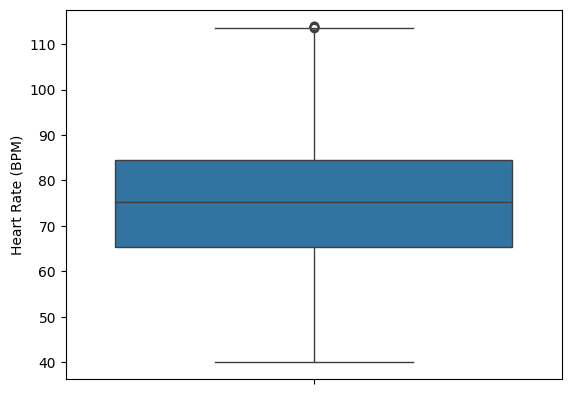

In [8]:
sns.boxplot(df['Heart Rate (BPM)'])

<Axes: ylabel='Blood Oxygen Level (%)'>

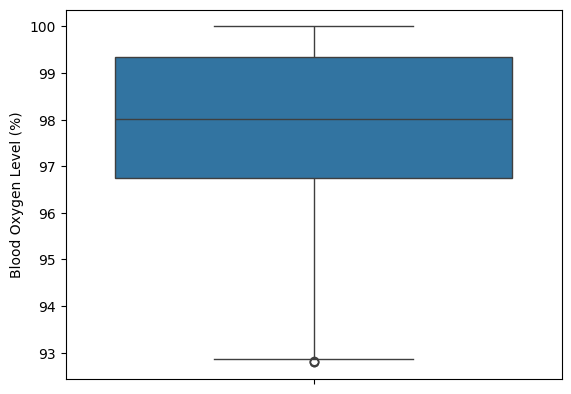

In [9]:
sns.boxplot(df['Blood Oxygen Level (%)'])

<Axes: xlabel='Step Count', ylabel='Count'>

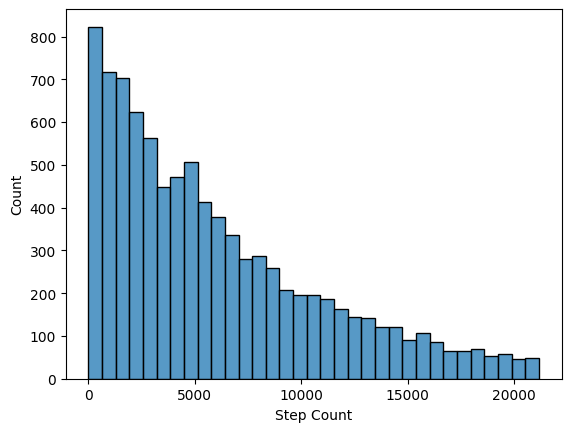

In [10]:
sns.histplot(df['Step Count'])

In [11]:
df = df[df['Step Count'] > 1000 ]

In [12]:
df.corr()['Fit']

User ID                   0.009093
Heart Rate (BPM)         -0.008239
Blood Oxygen Level (%)   -0.003387
Step Count                0.009022
Sleep Duration (hours)   -0.001506
Activity Level            0.003938
Stress Level              0.872482
Fit                       1.000000
Name: Fit, dtype: float64

In [13]:
df.corr()['Stress Level']

User ID                   0.007105
Heart Rate (BPM)         -0.013316
Blood Oxygen Level (%)   -0.011633
Step Count                0.010947
Sleep Duration (hours)    0.000595
Activity Level           -0.002523
Stress Level              1.000000
Fit                       0.872482
Name: Stress Level, dtype: float64

In [14]:
xdf = df.drop(columns=['User ID','Stress Level'])

In [15]:
xdf.sample(3)

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Fit
8576,84.52,100.00,14975,5.79,2,0
1309,82.71,96.16,11265,6.20,0,0
4292,81.19,95.94,11328,7.61,0,0


In [16]:
X = xdf.drop(columns=['Fit'])
y = xdf['Fit'].astype('float64')

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:

## Logistic regression
lor = LogisticRegression()
lor.fit(X_train, y_train)
lor_pred = lor.predict(X_test)
acc = accuracy_score(y_test, lor_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 49.65%


In [19]:
## Decision tree classifier
dtree = DecisionTreeClassifier(ccp_alpha = 0.0001, criterion='entropy')
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
acc = accuracy_score(y_test, dtree_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 48.42%


In [20]:
xdf.to_csv('../data/preproccessed/Smart_Watch_Health_Dataset_Cleaned(updated).csv', index=False)

In [21]:
import joblib

# Save model
joblib.dump(dtree, '../model/model_dtree_5003.joblib')

# Save scaler
joblib.dump(scaler, '../model/scaler_model_dtree_5003.joblib')


['../model/scaler_model_dtree_5003.joblib']

In [22]:
## saving model

# pickle.dump(dtree, open('../model/model_dtree_5003.pkl','wb'))
# pickle.dump(scaler, open('../model/scaler_model_dtree_5003.pkl','wb'))